In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
digits=load_digits()

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
x=digits['data']
y=digits['target']

6


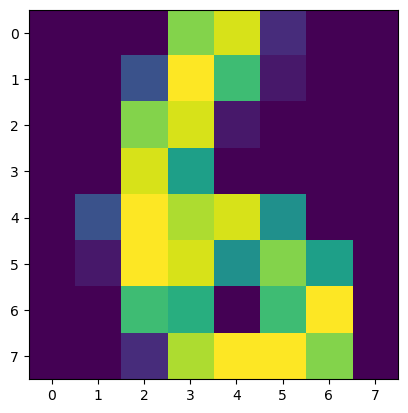

In [49]:
index=np.random.randint(0,x.shape[0])
plt.imshow(np.reshape((x[index,:]),(8,8)))
print(y[index])

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [55]:
x_train.shape,y_train.shape

((1347, 64), (1347,))

In [69]:
centers={}
for i in range(10):
    centers[i]=x_train[y_train==i,:].mean(axis=0)

In [71]:
centers

{0: array([0.00000000e+00, 3.00751880e-02, 4.03007519e+00, 1.30601504e+01,
        1.13308271e+01, 2.85714286e+00, 3.00751880e-02, 0.00000000e+00,
        0.00000000e+00, 8.79699248e-01, 1.21804511e+01, 1.35789474e+01,
        1.14511278e+01, 1.12180451e+01, 8.87218045e-01, 0.00000000e+00,
        0.00000000e+00, 3.64661654e+00, 1.43007519e+01, 5.49624060e+00,
        2.01503759e+00, 1.21278195e+01, 3.37593985e+00, 0.00000000e+00,
        0.00000000e+00, 5.11278195e+00, 1.29323308e+01, 2.12030075e+00,
        1.42857143e-01, 8.99248120e+00, 6.35338346e+00, 0.00000000e+00,
        0.00000000e+00, 5.81954887e+00, 1.16541353e+01, 9.17293233e-01,
        5.26315789e-02, 8.76691729e+00, 7.03759398e+00, 0.00000000e+00,
        0.00000000e+00, 3.42105263e+00, 1.34360902e+01, 1.84962406e+00,
        1.68421053e+00, 1.12105263e+01, 5.88721805e+00, 0.00000000e+00,
        0.00000000e+00, 7.81954887e-01, 1.28947368e+01, 1.01203008e+01,
        1.02556391e+01, 1.31654135e+01, 2.56390977e+00, 0.000

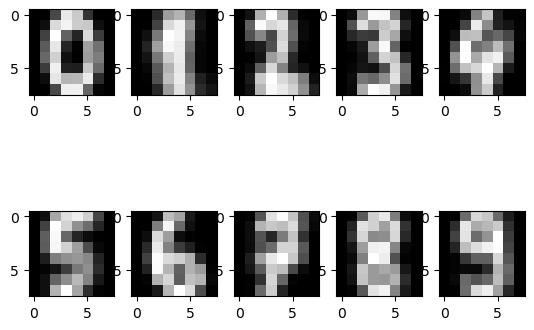

In [87]:
index=0
for i in range(2):
    for j in  range(5):
        ax=plt.subplot2grid((2,5),(i,j))
        ax.imshow(np.reshape(centers[index],(8,8)),cmap='grey')
        index+=1

In [125]:
def simple_classifier(centers,z):
    min=np.inf
    label=-1
    for i in range(10):
        d=np.linalg.norm(centers[i]-z)
        if d<min:
            label=i
            min=d
    return label

In [127]:
y_pred=[]
for i in range(x_test.shape[0]):
    y_pred.append(simple_classifier(centers,x_test[i,:]))
y_pred=np.asarray(y_pred)

In [129]:
from sklearn.metrics import accuracy_score as ac
print(ac(y_test,y_pred))

0.9088888888888889


In [145]:
from sklearn.svm import SVC as sv
for i in ['poly','linear','rbf','sigmoid']:
    model=sv(decision_function_shape='ovr',kernel=i,C=10)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(i,ac(y_test,y_pred))

poly 0.9866666666666667
linear 0.9777777777777777
rbf 0.9933333333333333
sigmoid 0.8155555555555556


In [153]:
from sklearn.metrics import f1_score as ac
from sklearn.svm import SVC as sv
for i in ['poly','linear','rbf','sigmoid']:
    model=sv(decision_function_shape='ovr',kernel=i,C=10)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(i,ac(y_test,y_pred,average='macro'))

poly 0.9866442329270593
linear 0.9780964559420304
rbf 0.9934501365432181
sigmoid 0.8226789066606226
